<a href="https://colab.research.google.com/github/sathasivamn/Naive-Bayes-and-Text-Mining/blob/main/Assignment_19_Naive_Bayes_and_Text_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive Bayes and Text Mining
### 1. Data Loading & Exploration
### 2. Text Preprocessing
### 3. TF-IDF Feature Extraction
### 4. Naive Bayes Classification
### 5. Evaluation of Classifier
### 6. Sentiment Analysis
### 7. Model Evaluation
### 8. Summary of Insights

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


# 1. Load and Explore the Data
#### - Loading Dataset
#### - Getting Data Information

In [2]:
# Load Dataset
df = pd.read_csv('blogs.csv')
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [3]:
# Basic Data Info
print("Shape:", df.shape)
print("Columns:", df.columns)
print("Null values:\n", df.isnull().sum())
print("Category distribution:\n", df['Labels'].value_counts())

Shape: (2000, 2)
Columns: Index(['Data', 'Labels'], dtype='object')
Null values:
 Data      0
Labels    0
dtype: int64
Category distribution:
 Labels
alt.atheism                 100
comp.graphics               100
comp.os.ms-windows.misc     100
comp.sys.ibm.pc.hardware    100
comp.sys.mac.hardware       100
comp.windows.x              100
misc.forsale                100
rec.autos                   100
rec.motorcycles             100
rec.sport.baseball          100
rec.sport.hockey            100
sci.crypt                   100
sci.electronics             100
sci.med                     100
sci.space                   100
soc.religion.christian      100
talk.politics.guns          100
talk.politics.mideast       100
talk.politics.misc          100
talk.religion.misc          100
Name: count, dtype: int64


# 2. Text Preprocessing
#### - Preprocessing Function

In [8]:
# Preprocessing Function
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
# Download the 'punkt_tab' resource
nltk.download('punkt_tab') # This line is added to download the necessary resource.
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()  # lowercase
    text = ''.join([char for char in text if char not in string.punctuation])  # remove punctuation
    tokens = word_tokenize(text)  # tokenize
    filtered_words = [word for word in tokens if word not in stop_words]  # remove stopwords
    return ' '.join(filtered_words)

df['cleaned'] = df['Data'].astype(str).apply(clean_text)
df[['Data', 'cleaned']].head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,Data,cleaned
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,path cantaloupesrvcscmuedumagnesiumclubcccmued...
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,newsgroups altatheism path cantaloupesrvcscmue...
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,path cantaloupesrvcscmuedudasnewsharvardedunoc...
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,path cantaloupesrvcscmuedumagnesiumclubcccmued...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,xref cantaloupesrvcscmuedu altatheism53485 tal...


# 3. TF-IDF Vectorization
#### - Converting text to numerical data

In [9]:
# Convert text to numerical data using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned'])
y = df['Labels']

# 4. Naive Bayes Classification
#### - Train/Test Split
#### - Train Naive Bayes Model
#### - Predict

In [10]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Train Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [12]:
# Predict
y_pred = nb_model.predict(X_test)

# 5. Evaluation of Classifier

In [13]:
# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.52      0.89      0.65        18
           comp.graphics       0.62      0.83      0.71        18
 comp.os.ms-windows.misc       0.95      0.86      0.90        22
comp.sys.ibm.pc.hardware       0.95      0.76      0.84        25
   comp.sys.mac.hardware       0.87      0.95      0.91        21
          comp.windows.x       1.00      0.80      0.89        25
            misc.forsale       0.92      0.61      0.73        18
               rec.autos       0.89      0.89      0.89        18
         rec.motorcycles       0.88      0.88      0.88        16
      rec.sport.baseball       0.80      0.89      0.84        18
        rec.sport.hockey       0.83      1.00      0.91        15
               sci.crypt       0.82      0.95      0.88        19
         sci.electronics       0.68      0.81      0.74        16
                 sci.med       0.94      0.88      

# 6. Sentiment Analysis on Blog Texts
#### - Sentiment Analysis
#### - Sentiment Distribution by Category

In [14]:
# Sentiment Analysis
sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = sia.polarity_scores(text)['compound']
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Data'].astype(str).apply(get_sentiment)
df[['Labels', 'Sentiment']].head()

,Labels,Sentiment
0,alt.atheism,Negative
1,alt.atheism,Positive
2,alt.atheism,Negative
3,alt.atheism,Negative
4,alt.atheism,Positive


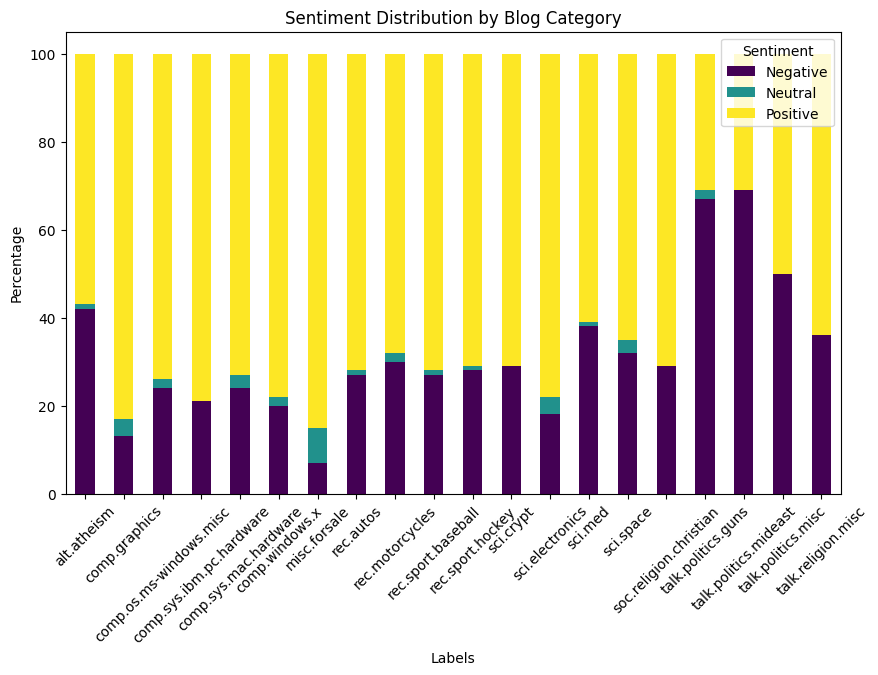

In [15]:
# Sentiment Distribution by Category
sentiment_dist = pd.crosstab(df['Labels'], df['Sentiment'], normalize='index') * 100
sentiment_dist.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title("Sentiment Distribution by Blog Category")
plt.ylabel("Percentage")
plt.xticks(rotation=45)
plt.show()

# 7. Model Evaluation
#### - Accuracy
#### - Precision, Recall, F1-Score
#### - Detailed report
#### - Confusion Matrix

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

Accuracy Score: 0.8200


In [19]:
# Precision, Recall, F1-Score (macro for balanced view across all classes)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Precision (macro): {precision:.4f}")
print(f"Recall (macro): {recall:.4f}")
print(f"F1 Score (macro): {f1:.4f}")

Precision (macro): 0.8350
Recall (macro): 0.8308
F1 Score (macro): 0.8161


In [20]:
# Detailed report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.52      0.89      0.65        18
           comp.graphics       0.62      0.83      0.71        18
 comp.os.ms-windows.misc       0.95      0.86      0.90        22
comp.sys.ibm.pc.hardware       0.95      0.76      0.84        25
   comp.sys.mac.hardware       0.87      0.95      0.91        21
          comp.windows.x       1.00      0.80      0.89        25
            misc.forsale       0.92      0.61      0.73        18
               rec.autos       0.89      0.89      0.89        18
         rec.motorcycles       0.88      0.88      0.88        16
      rec.sport.baseball       0.80      0.89      0.84        18
        rec.sport.hockey       0.83      1.00      0.91        15
               sci.crypt       0.82      0.95      0.88        19
         sci.electronics       0.68      0.81      0.74        16
                 sci.med       0.94      0.88      

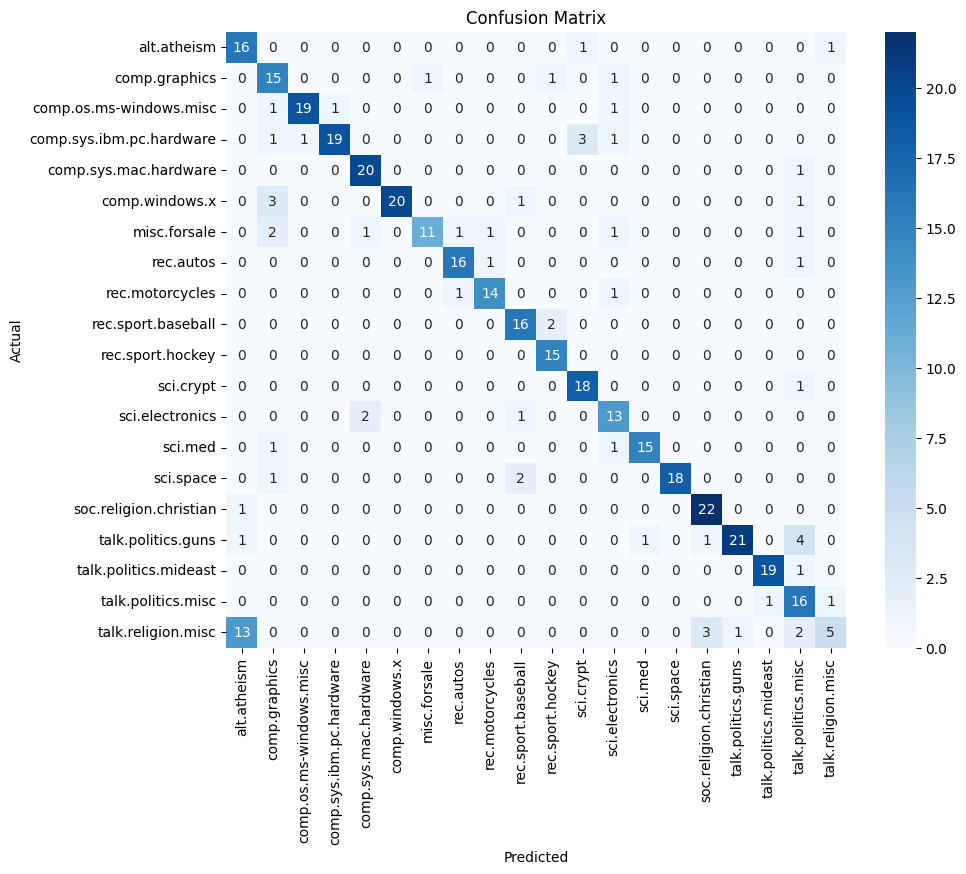

In [21]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 8. Summary of Insights

### Model Evaluation:
#### - Report accuracy, precision, recall, F1-score.
#### - Identify which categories are most accurately classified.
##### - Accuracy: The overall correct predictions divided by total predictions.
##### - Precision (macro): Measures how many selected items are relevant across classes.
##### - Recall (macro): Measures how many relevant items are selected across classes.
##### - F1 Score (macro): Harmonic mean of precision and recall – balances both.
##### - Classification Report: Gives precision, recall, f1, and support for each class.
##### - Confusion Matrix: Visualizes prediction errors per class.

### Sentiment Analysis:
#### - Sentiment trends across categories (e.g., Technology blogs more neutral, Politics more negative?).
#### - Consider using average compound scores for deeper insights.